# Import libraries and dataset

In [3]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv('../datasets/tipo_porno_consumido.csv', index_col =0)
data.dropna(inplace=True)
data.head(2)

,Id,tipo_porno
0,3,Lesbianas
1,8,Propia o sexo oral


## Data cleaning

In [5]:
data.tipo_porno = data.tipo_porno.str.lower()

In [6]:
# Creamos un backup
data_raw = data.copy()

In [7]:
# Añadimos ; al final de cada respuesta para poder después facilitar el cleaning
data.tipo_porno = data.tipo_porno + ';'
data.head(2)

,Id,tipo_porno
0,3,lesbianas;
1,8,propia o sexo oral;


In [8]:
# Transformamos la columna tipo_porno en un string todo unido
text_ = " ".join(data.tipo_porno)

In [9]:
# Lo convertimos a lower case todo
text_  = text_.lower()
text_

'lesbianas; propia o sexo oral; oldies, violaciones y negros; lésbico ; lesbica ; videos; depende más por curiosidad sobre temas de actualidad y que es; violento; hetero, lesbianas, amateur, tríos ; normal; lesbianas, sexo oral hetero; amateur; homosexual, asiático, lésbico (muy poco) y todo amateur; webs; tríos / orgías / lésbico ; lesbianas; no es concreta; lésbico; amateur/teen/creampie; autogestivo/personas que generan contenido; donde haya solo mujeres y que parezca al menos que lo estan pasando bien; tradicional por llamarla así; erika lust; generalmente gifs de sexo oral; lésbica; lo más visto ; -; amateur / parejas reales ; hardcore; erika lust y videos de ese estilo; gay o videos más realistas; lésbica; mujeres; suave; lesbico; porno lesbico; lesbianas; lesbica; bdsm; ... ; lesbiana; intento buscar penes y hombres que no salgan cortados y que giman rollo macho , en transportes públicos , hombres más mayores , mejor con pelo ; lésbico ; parejas y con orgasmo femenino ; heterose

In [10]:
# Aplicamos una regular expression para split el texto en función de: ';', ',' , '/' y ' o '
import re
clean_text  = re.split(';|,|/| o |\+', text_)
clean_text

['lesbianas',
 ' propia',
 'sexo oral',
 ' oldies',
 ' violaciones y negros',
 ' lésbico ',
 ' lesbica ',
 ' videos',
 ' depende más por curiosidad sobre temas de actualidad y que es',
 ' violento',
 ' hetero',
 ' lesbianas',
 ' amateur',
 ' tríos ',
 ' normal',
 ' lesbianas',
 ' sexo oral hetero',
 ' amateur',
 ' homosexual',
 ' asiático',
 ' lésbico (muy poco) y todo amateur',
 ' webs',
 ' tríos ',
 ' orgías ',
 ' lésbico ',
 ' lesbianas',
 ' no es concreta',
 ' lésbico',
 ' amateur',
 'teen',
 'creampie',
 ' autogestivo',
 'personas que generan contenido',
 ' donde haya solo mujeres y que parezca al menos que lo estan pasando bien',
 ' tradicional por llamarla así',
 ' erika lust',
 ' generalmente gifs de sexo oral',
 ' lésbica',
 ' lo más visto ',
 ' -',
 ' amateur ',
 ' parejas reales ',
 ' hardcore',
 ' erika lust y videos de ese estilo',
 ' gay',
 'videos más realistas',
 ' lésbica',
 ' mujeres',
 ' suave',
 ' lesbico',
 ' porno lesbico',
 ' lesbianas',
 ' lesbica',
 ' bdsm',
 '

    Aquí ya tenemos nuestro tokens limpios, utilizamos el Counter para crear el value_counts

In [11]:
from collections import Counter
dict(Counter(clean_text))

{'lesbianas': 1,
 ' propia': 1,
 'sexo oral': 1,
 ' oldies': 1,
 ' violaciones y negros': 1,
 ' lésbico ': 3,
 ' lesbica ': 1,
 ' videos': 1,
 ' depende más por curiosidad sobre temas de actualidad y que es': 1,
 ' violento': 1,
 ' hetero': 1,
 ' lesbianas': 5,
 ' amateur': 3,
 ' tríos ': 2,
 ' normal': 1,
 ' sexo oral hetero': 1,
 ' homosexual': 1,
 ' asiático': 1,
 ' lésbico (muy poco) y todo amateur': 1,
 ' webs': 1,
 ' orgías ': 1,
 ' no es concreta': 1,
 ' lésbico': 3,
 'teen': 1,
 'creampie': 1,
 ' autogestivo': 1,
 'personas que generan contenido': 1,
 ' donde haya solo mujeres y que parezca al menos que lo estan pasando bien': 1,
 ' tradicional por llamarla así': 1,
 ' erika lust': 1,
 ' generalmente gifs de sexo oral': 1,
 ' lésbica': 2,
 ' lo más visto ': 1,
 ' -': 1,
 ' amateur ': 1,
 ' parejas reales ': 1,
 ' hardcore': 1,
 ' erika lust y videos de ese estilo': 1,
 ' gay': 1,
 'videos más realistas': 1,
 ' mujeres': 1,
 ' suave': 1,
 ' lesbico': 1,
 ' porno lesbico': 1,
 ' 

# Replace the similar items by one specific word
## Data-arrengement of the 'clean_text' 

In [12]:
clean_text = pd.DataFrame(clean_text).reset_index()

In [13]:
clean_text.columns  = ['index', 'tipo_porno']

In [14]:
clean_text.tipo_porno.unique()

array(['lesbianas', ' propia', 'sexo oral', ' oldies',
       ' violaciones y negros', ' lésbico ', ' lesbica ', ' videos',
       ' depende más por curiosidad sobre temas de actualidad y que es',
       ' violento', ' hetero', ' lesbianas', ' amateur', ' tríos ',
       ' normal', ' sexo oral hetero', ' homosexual', ' asiático',
       ' lésbico (muy poco) y todo amateur', ' webs', ' orgías ',
       ' no es concreta', ' lésbico', 'teen', 'creampie', ' autogestivo',
       'personas que generan contenido',
       ' donde haya solo mujeres y que parezca al menos que lo estan pasando bien',
       ' tradicional por llamarla así', ' erika lust',
       ' generalmente gifs de sexo oral', ' lésbica', ' lo más visto ',
       ' -', ' amateur ', ' parejas reales ', ' hardcore',
       ' erika lust y videos de ese estilo', ' gay',
       'videos más realistas', ' mujeres', ' suave', ' lesbico',
       ' porno lesbico', ' lesbica', ' bdsm', ' ... ', ' lesbiana',
       ' intento buscar penes y

In [15]:
#Remove spaces in the BEGINNING of a string:
clean_text.tipo_porno = clean_text.tipo_porno.str.lstrip()
#Remove spaces in the END of a string:
clean_text.tipo_porno = clean_text.tipo_porno.str.rstrip()

## Reemplazamos los valores

In [16]:
clean_text.tipo_porno.replace(['lésbico', 'lesbianas',
                                    'lesbianas', 'porno lesbico', 
                                    'lesbico','lésbica','lesbiana',
                              'lesbica','donde haya solo mujeres y que parezca al menos que lo estan pasando bien'], 
                              'lésbico',
                              inplace=True)

In [17]:
clean_text.tipo_porno.replace(['propia','lésbico (muy poco) y todo amateur',
                               'autogestivo','personas que generan contenido','parejas reales'
                              'videos más realistas','videos'],'amateur', inplace=True)

In [18]:
tipo_porno_replace_map = {'sexo oral hetero':'sexo oral',
                         'depende más por curiosidad sobre temas de actualidad y que es':'no es concreta',
                         'generalmente gifs de sexo oral':'sexo oral','violaciones y negros':'violaciones',
                         'videos':'no es concreta', 'hetero':'heterosexual','hardcore':'violento',
                         'erika lust y videos de ese estilo':'erika lust','gay':'homosexual','hombres más mayores':'oldies',
                         'trios':'tríos','publico':'espacios públicos', 'gay (hombres)':'homosexual','en transportes públicos':'espacios públicos',
                         'tradicional por llamarla así':'normal','lo más visto':'otros', '-':'ns/nc',
                         'videos más realistas':'parejas reales','mujeres':'lésbico','...':'ns/nc',
                          'intento buscar penes y hombres que no salgan cortados y que giman rollo macho':'otros',
                          'mejor con pelo':'otros','parejas y con orgasmo femenino':'parejas reales',
                          'pero muchas veces dejo de mirarla pk no me gusta ep contenido':'no es concreta',
                          'muy dura':'violento','me intento esforzar para que me pongan otras cosas pero no lo consigo.':'violaciones',
                          'erotico':'erika lust','ahora ya ni llego a abrir los vídeos.':'otros','':'ns/nc'
                         }

In [19]:
clean_text.tipo_porno.replace(tipo_porno_replace_map,inplace=True)

In [20]:
clean_text.tipo_porno.replace(['violaciones','violento'],'violento/violaciones',inplace=True)

In [21]:
clean_text.tipo_porno.replace(['tríos','orgías'],'tríos/orgías',inplace=True)

In [22]:
clean_text.tipo_porno.replace(['amateur','parejas reales'],'amateur/parejas reales',inplace=True)

In [23]:
clean_text.tipo_porno.unique()

array(['lésbico', 'amateur/parejas reales', 'sexo oral', 'oldies',
       'violento/violaciones', 'no es concreta', 'heterosexual',
       'tríos/orgías', 'normal', 'homosexual', 'asiático', 'webs', 'teen',
       'creampie', 'erika lust', 'otros', 'ns/nc', 'suave', 'bdsm',
       'espacios públicos', 'gratuita', 'masajes', 'peliculas', 'anal'],
      dtype=object)

In [24]:
clean_text.tipo_porno.value_counts()

lésbico                   22
amateur/parejas reales    12
violento/violaciones       5
tríos/orgías               4
otros                      4
no es concreta             3
sexo oral                  3
homosexual                 3
erika lust                 3
ns/nc                      3
normal                     2
heterosexual               2
oldies                     2
espacios públicos          2
peliculas                  1
masajes                    1
webs                       1
creampie                   1
teen                       1
asiático                   1
gratuita                   1
suave                      1
bdsm                       1
anal                       1
Name: tipo_porno, dtype: int64

# Plot 

In [25]:
porno_plot = pd.DataFrame(clean_text.tipo_porno.value_counts())

In [26]:
porno_plot=porno_plot.reset_index()

In [27]:
porno_plot.columns = ['name', 'value']

In [28]:
#pip install circlify

In [29]:
# import the circlify library
import circlify

# compute circle positions:
circles = circlify.circlify(
    porno_plot['value'].tolist(), 
    show_enclosure=False, 
    target_enclosure=circlify.Circle(x=0, y=0, r=1))

In [30]:
type(circles) #check the type

list

In [31]:
print(circles) #check that each circle have x, y and r

[Circle(x=0.49146420832168425, y=0.10964195027812307, r=0.09238907323486119, level=1, ex={'datum': 1}), Circle(x=0.4107941916262531, y=0.42643778893250095, r=0.09238907323486119, level=1, ex={'datum': 1}), Circle(x=0.5346392973325601, y=0.2893051771824876, r=0.09238907323486119, level=1, ex={'datum': 1}), Circle(x=-0.4176482388979396, y=0.7571226768988442, r=0.09238907323486119, level=1, ex={'datum': 1}), Circle(x=-0.15530772194678297, y=0.8427884377705486, r=0.09238907323486119, level=1, ex={'datum': 1}), Circle(x=0.23796006368450784, y=0.7489742922428234, r=0.09238907323486119, level=1, ex={'datum': 1}), Circle(x=0.4187213182664694, y=0.6110458171328375, r=0.09238907323486119, level=1, ex={'datum': 1}), Circle(x=0.5914770699422265, y=0.46512449073352524, r=0.09238907323486119, level=1, ex={'datum': 1}), Circle(x=0.6686446714521898, y=0.16208283983623245, r=0.09238907323486119, level=1, ex={'datum': 1}), Circle(x=0.12921631556210106, y=0.8983655927160331, r=0.09238907323486119, level=

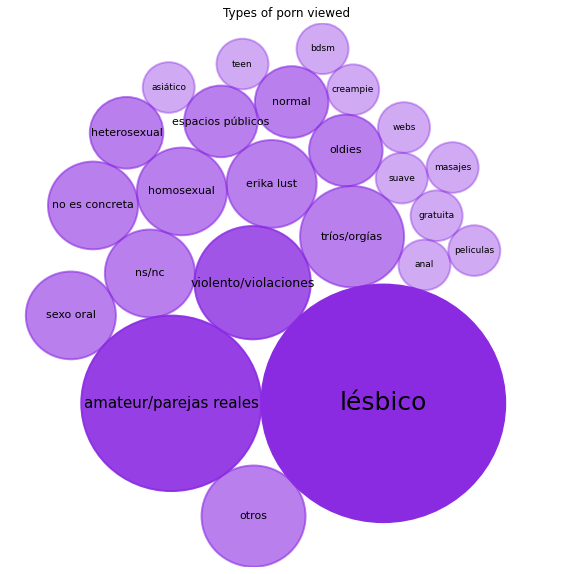

In [32]:
 # import libraries
import matplotlib.pyplot as plt

# Create just a figure and only one subplot
fig, ax = plt.subplots(figsize=(10,10))

# Title
ax.set_title('Types of porn viewed')

# Remove axes
ax.axis('off')

# Find axis boundaries
lim = max(max(abs(circle.x) + circle.r, abs(circle.y) + circle.r,)for circle in circles)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# list of labels
porno_plot = porno_plot.sort_values(by='value', ascending=True)
labels = porno_plot['name']

# print circles
for circle, label in zip(circles, labels):
    x, y, r = circle
    if r> 0.4:
        ax.add_patch(plt.Circle((x, y), r, color= 'BlueViolet', linewidth=2))
        plt.annotate(
              label, 
              (x,y ) ,
              va='center',
              ha='center',fontsize=25
         )
    elif r>0.3:
        ax.add_patch(plt.Circle((x, y), r, color= 'BlueViolet',alpha=0.90, linewidth=2))
        plt.annotate(
              label, 
              (x,y ) ,
              va='center',
              ha='center',fontsize=15
         )
    elif r>0.2:
        ax.add_patch(plt.Circle((x, y), r, color= 'BlueViolet',alpha=0.80, linewidth=2))
        plt.annotate(
              label, 
              (x,y ) ,
              va='center',
              ha='center',fontsize=12.5
         )
    elif r<0.1:
        ax.add_patch(plt.Circle((x, y), r, color= 'BlueViolet',alpha=0.4, linewidth=2))
        plt.annotate(
              label, 
              (x,y ) ,
              va='center',
              ha='center',fontsize=9
         )
    else:
        ax.add_patch(plt.Circle((x, y), r, color= 'BlueViolet',alpha=0.6, linewidth=2))
        plt.annotate(
              label, 
              (x,y ) ,
              va='center',
              ha='center',fontsize=11
         )



In [33]:
fig.savefig("tipo_porno_buble.png", dpi=150)